In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc
%matplotlib inline

In [2]:
rc('font', family='Comic Sans MS')

In [26]:
stopien = np.pi/180
podzialka = 5 * stopien
R = 0.149
D_alpha = np.sqrt((podzialka**2)/3 + (podzialka/2)**2/3)

Dla 1 zwoju




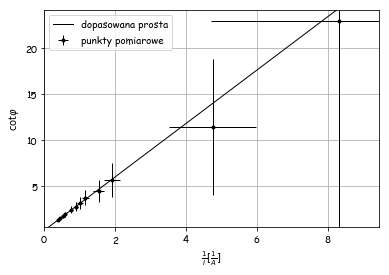

a = 2.904 +/- 0.074
 H_g = 9.746 +/- 0.136
Dla 3 zwoju




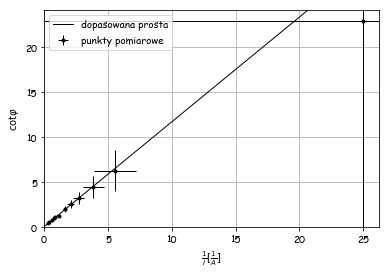

a = 1.163 +/- 0.048
 H_g = 11.705 +/- 0.153
Dla 5 zwoju




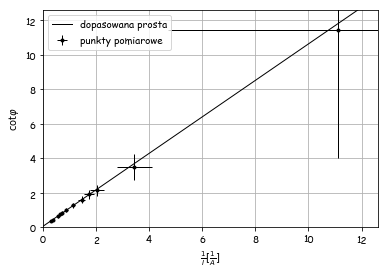

a = 1.058 +/- 0.017
 H_g = 17.749 +/- 0.070


In [29]:
def analiza(numer):
    N = pd.read_csv(f'Zwoje_{numer}.csv', sep=',\s', engine='python')
    D_amper = N['I[A]']*0.02+0.05
    nad_I = 1/N['I[A]']
    ctan = 1/np.tan(N['alpha[o]']*stopien)
    D_ctan = D_alpha/np.sin(N['alpha[o]']*stopien)**2
    D_nad_I = D_amper/N['I[A]']**2
    print(f'Dla {numer} zwoju\n\n')
    plt.errorbar(nad_I,ctan,D_ctan,D_nad_I,'k.',label='punkty pomiarowe',elinewidth=1)
    plt.ylim(np.floor(ctan.min())*0.5,np.ceil(ctan.max())*1.05)
    plt.xlim(np.floor(nad_I.min())*0.5,np.ceil(nad_I.max())*1.05)
    zakres = np.linspace(np.floor(nad_I.min())*0.5,np.ceil(nad_I.max())*1.05)
    prosta, kowariancja = np.polyfit(nad_I, ctan,1,cov=True,w=1/D_ctan)
    plt.plot(zakres, np.polyval(prosta, zakres),'k',label='dopasowana prosta',linewidth=1)
    plt.grid()
    plt.xlabel(r'$\frac{1}{I}[\frac{1}{A}]$')
    plt.ylabel(r'$\cot{\varphi}$')
    plt.legend(loc='best')
    plt.savefig(f"wykres_{numer}.eps")
    # plt.savefig(f"wykres_{numer}.png")
    plt.show()
    print(f'a = {prosta[0]:.3f} +/- {np.sqrt(kowariancja[0,0]):.3f}')
    H_g = prosta[0]*numer/(2*R)
    D_H_g = np.sqrt( kowariancja[0,0]*numer/(2*R))
    print(f' H_g = {H_g:.3f} +/- {D_H_g:.3f}')
    pd.set_option('precision', 3)
    with open(f"tabelka_{numer}.tex", "w") as file:
        dataframe = pd.DataFrame()
        dataframe[r"$\varphi[^\circ]$"] = N['alpha[o]']
        dataframe[r"$\Delta \varphi[^\circ]$"] = D_alpha / stopien
        dataframe[r"I[A]"] = N['I[A]']
        dataframe[r"$\Delta$I[A]"] = D_amper
        dataframe[r"$\frac{1}{I}$"] = nad_I
        dataframe[r"$\Delta \frac{1}{I}$"] = D_nad_I
        dataframe[r"$\cot{\varphi}$"] = ctan
        dataframe[r"$\Delta \cot{\varphi}$"] = D_ctan
        dataframe = dataframe.sort_values(by=[r"$\varphi[^\circ]$"])
        file.write(dataframe.to_latex(escape=False))

for numer in [1, 3, 5]:
    analiza(numer)